# Problem Statement

The problem deals with the assignment of incidents raised by Business and IT Users,  End users and vendors through ticketing systems. Assigning these tickets are done manually and there are lot of challenges associated with it, including human errors and response time. 

Based on the type of issue and the level of resolution required, the tickets are assigned to L1/L2 (Service Desk teams) or L3 (Functional teams)

Two of the major issues are 

1. The assignment of tickets to the wrong group or functional teams. 
2. The increased turnaround time to some of these incidents have resulted in poor customer service. 

# Objective of the project

The focus of the project is to classify the incidents to be assigned to the right functional groups. The goal is to build a classifier that can classify these incident management tickets by analysing texts in these tickets.

# Project approach

The project goal is achived using the different milestone as seen below. At the outset, an attempt has been made to work on the following

1. Learn how to use different text classification models.
2. Use transfer learning to use pre-built models.
3. Learn to ​ set the optimizers, loss functions, epochs, learning rate, batch size,
checkpointing, early stopping etc.
4. Read different research papers of a 
given domain to obtain the knowledge of
advanced models for the given problem.


# Milestone 1: Pre-Processing, Data Visualisation and EDA

### Import the required libraries for the Milestone 1 deliverable

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Exploring the given Data files
We will try and gather more information from the data. For that, we will do the following

1. Data Collection
2. Data Cleaning
3. Data Analysis  
4. Data Visualization

The above aspects are accomplished by the a series of functions which we will perform on the dataset. We will have observations noted as we run each of them

In [2]:
# Mount the drive to get required files
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
#Set your project path 
path = '/content/drive/My Drive/Capstone Project/'

In [4]:
# Load the dataset 
data = pd.read_excel(path + 'input_data.xlsx')

In [5]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


### Initial observations on the Data set

1. Upon analyzing the first 5 records of the data set, we can firmly say that the objective could be solved using Supervised Learning algorithm and classification techniques. 

2. The Short description would be the independent attribute and the Description field would be the dependent attribute for the problem that we are solving.

In [6]:
data.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


### Observations on Data Attributes

A quick look into the attributes of the data set. These are the information that we already have.
1. Short description --- Short form of the complete details in easily identifiable words
2. Description       --- The details of the complete incident that has come from the various users
3. Caller            --- Anonymized representation of the first and last name of the users
4. Assignment group  --- There are about 73 groups into which the different incidents are being categorized.

### Inference on Data attributes

Upon observing the dataset, 
1. We can say that the assignment group would be a critical attribute for the business. Based on the Short description, the tickets are being categorized into this attribute.
2. Also, we can drop the column named Caller as it does not add any value to our analysis 

In [7]:
data['Short description'][0:]

0                                             login issue
1                                                 outlook
2                                      cant log in to vpn
3                           unable to access hr_tool page
4                                            skype error 
                              ...                        
8495                    emails not coming in from zz mail
8496                             telephony_software issue
8497    vip2: windows password reset for tifpdchb pedx...
8498                       machine nÃ£o estÃ¡ funcionando
8499    an mehreren pc`s lassen sich verschiedene prgr...
Name: Short description, Length: 8500, dtype: object

### Observations on the records in Data set

1. There are about 8500 records which have been given to us in the data set.
2. Some of the incidents are fairly simple like login issue. Some have a complex short description
3. Some of them have many characters and data (email id) associated with it, which needs to be removed.
4. Some records have a short description which are in other languages (and not in English)


In the following section, we will Understanding the structure and characterestics of the data

In [8]:
# Printing the data types of all the attributes of the data set
data.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [9]:
# Printing the shape as well
data.shape

(8500, 4)

In [10]:
data.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7814,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


### More observations on records and data set
The data types (object) and the number of records (8500) and columns (4) are being observed here. Some other business insights that we get by executing the descrive method include

1. The Caller and Assignment Group dont have any missing items and their field has the required data.
2. When it comes to the number of unique items, we could observe that

*   8500 incidents have been created by 2950 users
*   GRP_0 seems to be the group to handle maximum number of incidents
*   Most incidents raised by the users deal with "Password reset" issue
*   One tenth of the incidents have come from one particular user (anonymized as bpctwhsn kzqsbmtp)
*   There are 74 unique groups to which all the incidents raised are distributed.

These are important patterms obtained from the above. We will derive more insights as we explore the data further


### Missing points in data set

In [11]:
# Renaming the columns so that it will be easier to use these attributes in the dataset during analysis

data.rename(columns={'Short description': 'Short_description', 'Assignment group': 'Assignment_group'}, inplace=True)
data.head()

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [12]:
data.isnull().sum()

Short_description    8
Description          1
Caller               0
Assignment_group     0
dtype: int64

### Approach in handling the missing points in data set

1. There are about 8 records whose Short descriptions field dont have a specific value
2. There is 1 Description field which has a missing value
3. So we will try t oreplace them with NaN in all missing fields.
4. We will drop the record which has the blank Description field, without that we cannot confidently fill the Short Description attribute.
5. For the missing Short description field, we will fill them by looking into Description and compare them with records having same/similar Description and their respective Short description. Since the Description field is going to be the same, we will use the Short Description as well and fill them with same content.

In [13]:
data['Description'] = data['Description'].replace('\n',np.NaN)
data['Short_description'] = data['Short_description'].replace('',np.NaN)

In [14]:
data.iloc[[7397, 2604, 3924]]

,Short_description,Description,Caller,Assignment_group
7397,browser issue :,NaN,fgejnhux fnkymoht,GRP_0
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0


In [15]:
#data['Description'] = 
data.drop(data.index[7397])

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [16]:
data['Short_description'].fillna('vpn login issue.', inplace=True)

In [17]:
# Manually checking the records to see if the NaN is filled up
data.iloc[[7397, 2604, 3924]]

,Short_description,Description,Caller,Assignment_group
7397,browser issue :,NaN,fgejnhux fnkymoht,GRP_0
2604,vpn login issue.,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34
3924,vpn login issue.,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0


bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
xcufgmhj yezfxmga      1
dycmlejx iycsvhzl      1
creojvdh ciblyskg      1
skxfydnr cdgrsqnw      1
xsnrlygw nmqyraec      1
Name: Caller, Length: 2950, dtype: int64


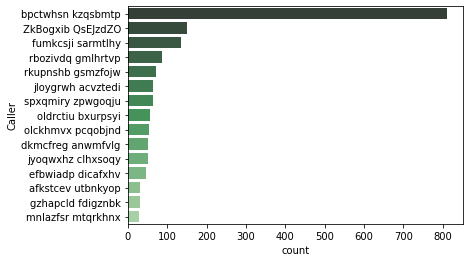

In [18]:
Temp1 = data.Caller.value_counts()
print(Temp1)
sns.countplot(y="Caller", data=data, palette="Greens_d",
              order=data.Caller.value_counts().iloc[:15].index)

In [19]:
data['Caller'].describe()

count                  8500
unique                 2950
top       bpctwhsn kzqsbmtp
freq                    810
Name: Caller, dtype: object

### Observations on the callers and incidents raised by them

Doing a count on the number of incidents raised by the Callers, we infer the following details from the incidents raised by these top 3 users

* User 1: bpctwhsn kzqsbmtp
* User 2: ZkBogxib QsEJzdZO 
* User 3: fumkcsji sarmtlhy
* User 4: rbozivdq gmlhrtvp

1. Most of the incidents reported by the user 1 are job_scheduler failures. There seems to be multiple reasons for this type of failures. 
2. User 2 and User 3 seems to have incidents reported on abandoned jobs and an update on the ticket.
3. Though the incidents have been assigned to different groups, there is a high possibility that they might have been raised by an administrator, considering the volume of tickets. 


In [20]:
Temp2 = data.groupby(['Assignment_group', 'Caller']).size().groupby(level=0).max().sort_values(ascending=False)
print(Temp2)
#data.groupby(['Caller', 'Assignment group']).size()

Assignment_group
GRP_8     362
GRP_9     153
GRP_0     132
GRP_5      96
GRP_6      89
         ... 
GRP_43      1
GRP_35      1
GRP_37      1
GRP_38      1
GRP_72      1
Length: 74, dtype: int64


### Assignment groups that are important to the business

* We try to derive an interesting business insight. 
* We are grouping the callers 
and Assignment Group and publish them by grouping them based on the Assignment Group. 
* The top 3 callers have logged their incidents into Group 8, Group 9 and Group 0. 


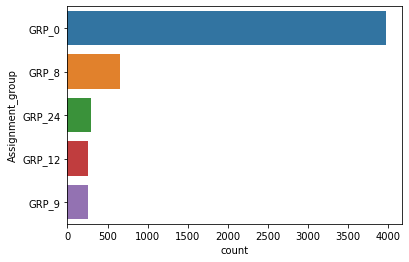

In [21]:
sns.countplot(y="Assignment_group", data=data, 
              order=data["Assignment_group"].value_counts().iloc[:5].index)

In [22]:
data['Assignment_group'].describe()

count      8500
unique       74
top       GRP_0
freq       3976
Name: Assignment_group, dtype: object

In [26]:
#Temp3 = data.groupby(['Short description', 'Assignment group']).size().sort_values(ascending=False)
#print(Temp3)
#data.groupby(['Short description', 'Assignment group']).size().groupby(level=1).max().sort_values(ascending=False)

Group the Assignment group andShort description and publishing them based on the maximum count

In [23]:
Temp3 = data[['Assignment_group','Short_description']].groupby('Assignment_group')['Short_description'].count().nlargest(20)
print(Temp3)

Assignment_group
GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
Name: Short_description, dtype: int64


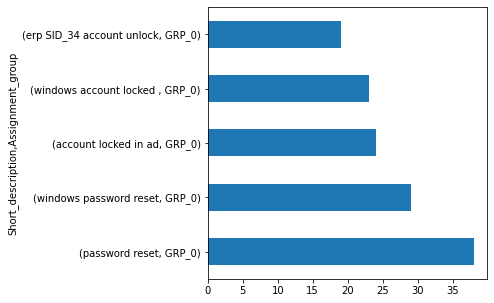

In [24]:
#.sort_values(ascending=False)
Temp4 = data.groupby(["Short_description", "Assignment_group"])["Caller"].count().nlargest(5)
Temp4.plot(kind='barh', figsize=(5,5))

### Top incident categories and Assignment groups to focus on 

1. We are grouping the Short description and Assignment Group and publish them.
2. We group them based on the Assignment Group that has the maximum incidents.
3. The top 5 incidents Group 0 (which has maximum incidents) are published.
4. This kind of insights can help the business focus more on the specific Assignment groups by allocating more resources to handle those incidents

In [25]:
#data['Assignment group'].hist( figsize = (50,10))
data['Assignment_group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_73       1
GRP_61       1
GRP_67       1
GRP_64       1
Name: Assignment_group, Length: 74, dtype: int64

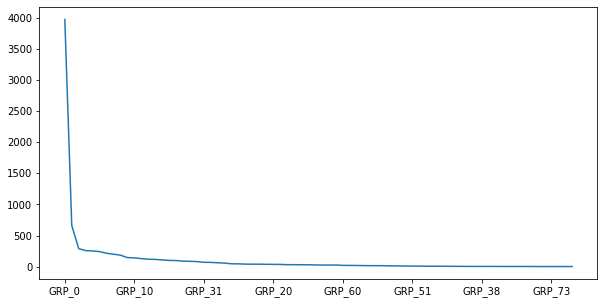

In [26]:
#plt.figure(figsize=(25,10))
#plt.plot(data['Assignment group'].value_counts().sort_index())
data['Assignment_group'].value_counts().plot(figsize =(10,5))

# The graph below gives an idea of the Assignment groups that have the maximum incidents

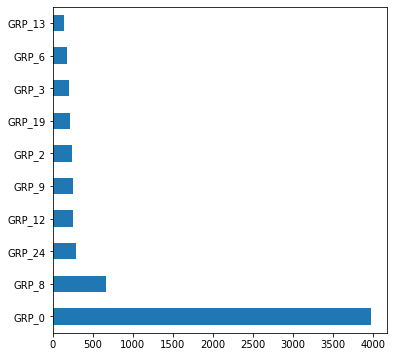

In [27]:
data['Assignment_group'].value_counts().head(10).plot(kind='barh', figsize=(6,6))

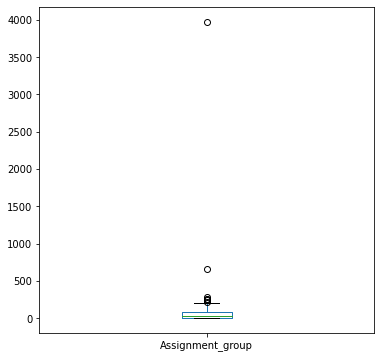

In [28]:
#sns.boxplot(x='Assignment group', data= data)
data['Assignment_group'].value_counts().plot(kind='box', figsize=(6,6))


1. The graph is just to indicate there are many outliers from an Assignment group perspective.
2. Working by taking average values to address ouliers may not really help 

Trying to understand how the incident details are captured in the Short description. Even though the intent is to capture only a few words of the incident, some have got more words. Trying to understand the objective behind the legthy statements of such incidents. Publishing the top 5.

In [29]:
data["Words_count_Short_description"] = data["Short_description"].apply(lambda x: len(str(x).split(" ")))

In [30]:
data[["Short_description" ,"Words_count_Short_description"]].sort_values(by = "Words_count_Short_description", ascending =False).head()

,Short_description,Words_count_Short_description
4385,pc set up for new employee -mghlisha.baranwfhr...,41
1076,hello on my order below. i have 5 drop s...,32
3907,i am not able to log into my vpn. when i am tr...,28
2881,"i did a po and it received with no problem, i ...",28
4164,urgent request to complete your requirement ...,27


In [31]:
# Converting the data type from object to str for further operations and analysis

data["Short_description"] = data["Short_description"].astype(str)
data["Description"] = data["Description"].astype(str)
data["Assignment_group"] = data["Assignment_group"].astype(str)

In [32]:
data.head()

,Short_description,Description,Caller,Assignment_group,Words_count_Short_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,2
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,1
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,3


In [33]:
from nltk.tokenize import RegexpTokenizer
import re

In [ ]:
# Finding the length of each of the incident's short description

#data['Short_description'].apply(len).sort_values(ascending=False)
#print(data['Short_description'].apply(lambda x: len(x.split(" "))).sort_values(ascending=False))
#data.tail()

We will try and dod a bit of Data Cleaning. Following are done to address that
1. Remove Stopwords
2. Handling case sensitive letter
3. Handling URL and others

In [34]:
# Data Cleaning operation for analysis

data["Short_description"] = data["Short_description"].apply(lambda x: x.lower())
data["Short_description"] = data["Short_description"].apply(lambda x: re.sub('\w*\d\w*', '',x))
data["Short_description"] = data["Short_description"].apply(lambda x: re.sub('http\S+:\/\/.*','',x))
data["Short_description"] = data["Short_description"].apply(lambda x: re.sub(' + ',' ',x))
data["Short_description"] = data["Short_description"].str.replace('[^\w\s]','')
data["Short_description"] = data["Short_description"].apply(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))
data["Short_description"] = data["Short_description"].apply(lambda x: re.sub(r'\<a href', ' ', x))
data["Short_description"] = data["Short_description"].apply(lambda x: re.sub(r'&amp;', '', x))
data["Short_description"] = data["Short_description"].apply(lambda x: re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', x))
data["Short_description"] = data["Short_description"].apply(lambda x: re.sub(r'<br />', ' ', x))

In [35]:
data.tail()

,Short_description,Description,Caller,Assignment_group,Words_count_Short_description
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29,7
8496,telephony software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,2
8497,windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,7
8498,machine não estã funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,4
8499,an mehreren pcs lassen sich verschiedene prgra...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,10


In [36]:
import nltk
nltk.download('stopwords')
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
# The following cblock, we attemp to remove the stop words and see that has performed.

data["Short_description"] = data["Short_description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data["Short_description"].tail()

8495                                emails coming zz mail
8496                             telephony software issue
8497             windows password reset tifpdchb pedxruyf
8498                         machine não estã funcionando
8499    mehreren pcs lassen sich verschiedene prgramdn...
Name: Short_description, dtype: object

In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Text preprocessing


Now, we will do lemmatization, since it will help in stripping the suffices of the words. Also, It makes use of the vocabulary and does a morphological analysis to obtain the root word. 

Lemmatization is preffered over stemming because stemming only converts the word into root word.

In [39]:
from textblob import TextBlob, Word
#from textblob import word
nltk.data.path.append('')
data["Short_description"] = data["Short_description"].apply(lambda x: " ".join([Word(myword).lemmatize(pos="v") for myword in x.split()]))
data["Short_description"].tail()

8495                                   email come zz mail
8496                             telephony software issue
8497             windows password reset tifpdchb pedxruyf
8498                         machine não estã funcionando
8499    mehreren pcs lassen sich verschiedene prgramdn...
Name: Short_description, dtype: object

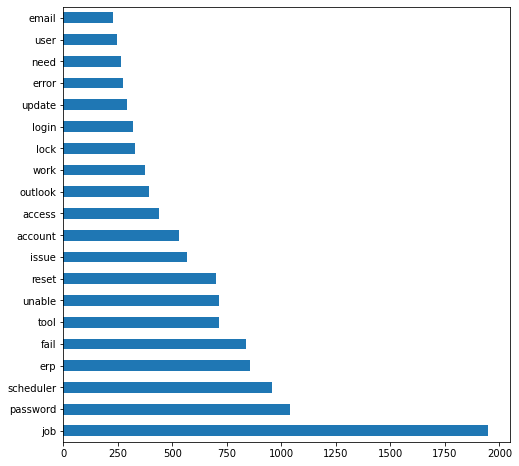

In [40]:
Short_description_most_freq_words = pd.Series(" ".join(data["Short_description"]).split()).value_counts()
Short_description_most_freq_words.head(20)
Short_description_most_freq_words.head(20).plot(kind='barh', figsize=(8,8))

### Observations

1. These are the most frequent words of the incidents in short description attribute. 
2. This will help us understand a brief about the kind of incidents that are being logged by the users.
3. Seeing the graph, we can say that maximum incidents logged by the users were frequently were because of a password issue, scheduled job failure issue or because of an issue with the erp

In [ ]:
#plot()
#sns.boxplot(x='Assignment group', data= data)
#data['Assignment group'].value_counts().plot(kind='box', figsize=(6,6))

In [ ]:
#data["Short description"] = data["Short description"].apply(lambda x: TextBlob(x).translate(to='en'))
#data["Short description"] = data["Short description"].apply(lambda x: TextBlob(x.strip()).translate(from= to='en'))

In [ ]:
blob = TextBlob(data["Short_description"][2499])
print(blob.detect_language())
print(blob.translate(to='en'))

### Observations

1. We wanted to quickly test if there are other languages and translate them to English.
2. This pre-processing technioque will help us analyze the data and to further process them.
3. We are using the TextBlob package to accomplish this translation. 
4. Running this more than once lead to an error "HTTP Error 429: Too Many Requests". Because TextBlob uses Google API translator, which cannot process too many requests at one time


In [ ]:
from time import sleep
from textblob import TextBlob
from textblob.exceptions import NotTranslated    

def translate_comment(x):
    try:
        # Try to translate the string version of the comment
        return TextBlob(str(x)).translate(to='en')
    except NotTranslated:
        # If the output is the same as the input just return the TextBlob version of the input
        return TextBlob(str(x))

for i in range(len(data["Short_description"])):
    # Detect and Translate one comment at a time
    blob = TextBlob(data["Short_description"].iloc[i])
    if (blob.detect_language()) != 'en' :
      data["Short_description"].iloc[i] = translate_comment(data["Short_description"].iloc[i])

    # Sleep for a few seconds (altering this based on the response)
    #sleep(0.1)

Creating tokens as required

In [41]:
from nltk.tokenize import RegexpTokenizer

### Tokenizer
1. As part of tokenization, we try to divide the given text into a sequence of words.
2. We will use the TextBlob library to convert the Short description Incident text into a Blob and the convert them into a sequence of words

Creating word vocabulary from the corpus of report text data


In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
TextBlob(data["Short_description"][2499]).words

WordList(['user', 'wish', 'set', 'lan', 'first', 'priority', 'internet'])

In [44]:
data["Short_description"][2499]

'user wish set lan first priority internet'

In [45]:
data["Short_description_tokens"] =  data["Short_description"].apply(lambda x: TextBlob(str(x)).words)
data["Short_description_tokens"].head(10)

0                                       [login, issue]
1                                            [outlook]
2                                     [cant, log, vpn]
3                     [unable, access, hr, tool, page]
4                                       [skype, error]
5                 [unable, log, engineer, tool, skype]
6    [event, criticalcompanycom, value, mountpoint,...
7    [employment, status, new, nonemployee, enter, ...
8                 [unable, disable, add, ins, outlook]
9                                     [ticket, update]
Name: Short_description_tokens, dtype: object

### Vocabulary

In [89]:
def Incident_type(incident):
    
    words = RegexpTokenizer('\w+').tokenize(incident)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [51]:
all_words = list()
for incident in data['Short_description']:
    for w in Incident_type(incident):
        all_words.append(w)

In [52]:
Vocabulary_Size = 'Size of vocabulary: {}'.format(len(set(all_words)))
print(Vocabulary_Size)

Size of vocabulary: 5442


### Learnings from Milestone 1

There are some key points learnt from Milestone 1. Mentioning a brief of how we would use them to perform the modeling and the strategy involved in doing them. 


From the problem challenge given and the analysis made above from Callers and Assignment groups, 

* We will focus only on the incidents that are raised in the rest of the Assignment groups excepting GRP_O.
* Model building and evaluation is only going to be done on the data records from GRP_1 to GRP_74. 
* Ths is because the modeling is done to classify incidents to the right functional groups (which is all assignment groups excepting GRP_0)
* The hypotheseis that I arrived at is GRP_0 is the service desk teams and GRP_1 to GRP_74 are the functional teams.


More reasoning for the above will be elaborated in the Final report submission.

## Recommendations to Business leads

#### Model that solves the major business challange

* Upon analyzing and comparing the results, we can conclude that **Model 3** is the recommended for L1/L2 teams.
* Model 3 will help classify incidents to L3 teams and we see that it gives a consistent accuracy of about 60%.
* Model 3 will solve the major challenge that L1/L2 teams will have by cutting down the time they spend in SOP review

#### Model developed for additinal business benefit

* We have also developed another model **Model 4** that will help the business in classifying the incidents.
* We get very good results with the classifier rightly predicting 95% of the times with an accuracy of 70%
* The top 6 groups comprise about 45% of the total incidents for SOP review by L1/L2 teams. 
* Hence this model will be really helpful to predict and assign the incidents to functional groups that manage high volumes.

#### Observations from the dataset given

* From the problem challenge, it is clear that L1/L2 teams spend about 15 minutes for each incident on SOP review.
* Hence the L1/L2 teams must be spending about 606.75 hours altogether on all the incidents.
* This is about 2427 incidents or approximately 28% of the overall incidents that the organization deals with.
* Also, about 25% of the SOP reviewed incidents which is close to 600+ incidents are being wrongly assigned to functional groups.

#### Recommendations to the L1/L2 teams and their leader 

* We see that Model 3 gives a consistent accuracy of about 60%.
* This means the classifier which we built (Model 3) will be able to predict close to 2/3rd of the incidents correctly.
* This can be made better based on the suggestions provided (below) and by repeatedely training the model on future incidents and by continuously modeling and monitoring the results.
* The recommendation to the business would be to use this classifier in combination with the manual analysis of the results by L1/L2 teams.
* Additionally, it is recommended to use the Model 4 to effectively manage the incidents assigned to the high volume L3 teams.







## Next steps and further improvement

Some of the high-level areas for improvement but detailed report will be made in final report

* Data Set for Analysis
  * Since many of the languages are not converted properly (using Google transalator), we can build seperate models for them 
  * We can as well use different word embbeddings for those languages for better predictions and results
  * We need more data since the dataset for SOP review has close 2500 records with some groups having less number of records, it is good to have more records to model further

* Model building
 * We can use different variants of LSTM and validate their behaviour
    * Latency controlled LSTM
    * Deep LSTM structures .... to name a few
  * We can build ensemble approaches or stacked model for better predictions
  * We also need domain expertise to see if those concepts would help us build better models
 


More detailed report and insights will be covered in the final project work which happens to be the next deliverable.